<a href="https://colab.research.google.com/github/RenatoCoronado99/Machine-Learning/blob/main/Trabajo_Random_Forest_FinalML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [ ]:
ColumnNames = ["sequence","mcg","gvh","alm","mit","erl","pox","vac","nuc","Class"]
path = "/content/drive/MyDrive/ML/Trabajo Final/yeast.xlsx"
data= pd.read_excel(path,names =ColumnNames)
data

,sequence,mcg,gvh,alm,mit,erl,pox,vac,nuc,Class
0,ADT2_YEAST,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,MIT
1,ADT3_YEAST,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,MIT
2,AAR2_YEAST,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,NUC
3,AATM_YEAST,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,MIT
4,AATC_YEAST,0.51,0.40,0.56,0.17,0.5,0.5,0.49,0.22,CYT
...,...,...,...,...,...,...,...,...,...,...
1473,YUR1_YEAST,0.81,0.62,0.43,0.17,0.5,0.0,0.53,0.22,ME2
1474,ZIP1_YEAST,0.47,0.43,0.61,0.40,0.5,0.0,0.48,0.47,NUC
1475,ZNRP_YEAST,0.67,0.57,0.36,0.19,0.5,0.0,0.56,0.22,ME2
1476,ZUO1_YEAST,0.43,0.40,0.60,0.16,0.5,0.0,0.53,0.39,NUC


In [ ]:
print(data.isnull().sum())

sequence    0
mcg         0
gvh         0
alm         0
mit         0
erl         0
pox         0
vac         0
nuc         0
Class       0
dtype: int64


In [ ]:
y = data["Class"].astype(str)

X = data.drop(["Class"],axis="columns")
X

,sequence,mcg,gvh,alm,mit,erl,pox,vac,nuc
0,ADT2_YEAST,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22
1,ADT3_YEAST,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22
2,AAR2_YEAST,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22
3,AATM_YEAST,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22
4,AATC_YEAST,0.51,0.40,0.56,0.17,0.5,0.5,0.49,0.22
...,...,...,...,...,...,...,...,...,...
1473,YUR1_YEAST,0.81,0.62,0.43,0.17,0.5,0.0,0.53,0.22
1474,ZIP1_YEAST,0.47,0.43,0.61,0.40,0.5,0.0,0.48,0.47
1475,ZNRP_YEAST,0.67,0.57,0.36,0.19,0.5,0.0,0.56,0.22
1476,ZUO1_YEAST,0.43,0.40,0.60,0.16,0.5,0.0,0.53,0.39


In [ ]:
X.dtypes

sequence     object
mcg         float64
gvh         float64
alm         float64
mit         float64
erl         float64
pox         float64
vac         float64
nuc         float64
dtype: object

In [ ]:
le = LabelEncoder()
X["sequence"] = le.fit_transform(X["sequence"])
y = le.fit_transform(y)
X

,sequence,mcg,gvh,alm,mit,erl,pox,vac,nuc
0,33,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22
1,34,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22
2,2,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22
3,4,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22
4,3,0.51,0.40,0.56,0.17,0.5,0.5,0.49,0.22
...,...,...,...,...,...,...,...,...,...
1473,1454,0.81,0.62,0.43,0.17,0.5,0.0,0.53,0.22
1474,1455,0.47,0.43,0.61,0.40,0.5,0.0,0.48,0.47
1475,1456,0.67,0.57,0.36,0.19,0.5,0.0,0.56,0.22
1476,1457,0.43,0.40,0.60,0.16,0.5,0.0,0.53,0.39


In [ ]:
print(f'X : {X.shape}')

X : (1478, 9)


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

In [ ]:
print(f"X_train {X_train.shape}")
print(f"X_train {y_train.shape}")
print(f"X_train {X_test.shape}")
print(f"X_train {y_test.shape}")

X_train (1034, 9)
X_train (1034,)
X_train (444, 9)
X_train (444,)


In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
max_features = ["auto","sqrt"]
max_depth=[2,4,6,8,10]
min_samples_split=[2,5]
min_samples_leaf=[1,2]
bootstrap=[True,False]
criterion = ["gini","entropy"]
param_grid = {
    "n_estimators": n_estimators,
    "max_features": max_features,
    "max_depth": max_depth,
    "min_samples_split":min_samples_split,
    "min_samples_leaf":min_samples_leaf,
    "bootstrap":bootstrap,
    "criterion":criterion
}
print(param_grid)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4, 6, 8, 10], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False], 'criterion': ['gini', 'entropy']}


In [ ]:
rf_model = RandomForestClassifier()

In [ ]:
rf_grid= GridSearchCV(estimator = rf_model,param_grid=param_grid,cv=3,verbose=2,n_jobs=-1)

In [ ]:
rf_grid.fit(X_train,y_train)

In [ ]:
from sklearn import tree
tree.plot_tree(rf_grid.best_estimator_.estimators_[rf_grid.best_params_["n_estimators"]-1])

In [ ]:
print(f'Train Accuracy : {rf_grid.score(X_train,y_train):.3f}')
print(f'Test Accuracy : {rf_grid.score(X_test,y_test):.3f}')

Train Accuracy : 0.844
Test Accuracy : 0.644


In [ ]:
best_params = rf_grid.best_params_
print(best_params)
print(rf_grid.best_score_)

{'bootstrap': True, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 33}
0.6170093247949668


In [ ]:
y_pred = rf_grid.predict(X_test)



CON CODIGO HECHO EN CLASE

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)
nEst = []
for i in range(1,200,3):
  nEst.append(i)
acc=[]
obb_error=[]
for i in nEst:
  #clf_p= RandomForestClassifier(n_estimators=i,warm_start=True,oob_score=True,criterion=best_params["criterion"])
  clf_p= RandomForestClassifier(n_estimators=i,max_depth=best_params["max_depth"],criterion=best_params["criterion"],oob_score=True,
                                min_samples_leaf=best_params["min_samples_leaf"],min_samples_split=best_params["min_samples_split"],max_features=best_params["max_features"])
  clf_p.fit(X_train,y_train)
  ##Afinar parametros de los estimadores 
  y_pred_p = clf_p.predict(X_test)
  score=accuracy_score(y_test,y_pred_p)
  acc.append(score)
  ##El obb bota un medida de precision 
  de los datos que no encontraron en el boostraping
  ##Sacando cuanto fallaste del 100%
  obb_error.append(1-clf_p.oob_score_)
  #print("n trees",i,"acc",score)

No handles with labels found to put in legend.


28


<Figure size 432x288 with 0 Axes>

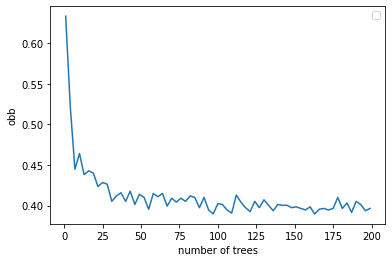

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(1)
plt.plot(nEst,obb_error)
plt.xlabel("number of trees")
plt.ylabel("obb")
plt.legend()
index_max = max(range(len(acc)),key = acc.__getitem__)
print(nEst[index_max])
plt.figure(2)


('sequence', 0.11971074886319738)
('mcg', 0.15707118855062716)
('gvh', 0.12737019874548883)
('alm', 0.24233396638673307)
('mit', 0.15752990545498088)
('erl', 0.005642788666390496)
('pox', 0.018233615991883494)
('vac', 0.0669692485459668)
('nuc', 0.10513833879473188)


<BarContainer object of 9 artists>

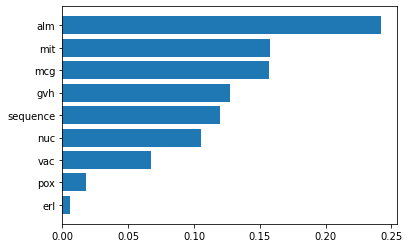

In [ ]:
for feature in zip(ColumnNames,clf_p.feature_importances_):
  print(feature)
sorted = clf_p.feature_importances_.argsort()
ColumnNames = np.array(ColumnNames)  
ColumnNames
plt.barh(ColumnNames[sorted],clf_p.feature_importances_[sorted])